<EMA>

In [ ]:
from algobot.BackTester import EMABackTester

In [ ]:
tester = EMABackTester("KRW-BTC", count=730)

In [ ]:
tester.test_strategy()

In [ ]:
tester.plot_returns()

<SMA EMA Cross Strategy>

In [ ]:
from algobot.BackTester import CrossSmaEmaBackTester

In [ ]:
tester = CrossSmaEmaBackTester("KRW-BTC", count=730, interval="minute10")`

In [ ]:
tester.test_strategy()

In [ ]:
tester.plot_returns()

In [ ]:
tester.optimize_parameters((20,100,1))

In [ ]:
tester.update_and_run(65)

In [ ]:
tester.plot_returns()

In [ ]:
tester.results.loc["2022",["SMA","EMA","position"]].plot(secondary_y="position")

- Moving Average Convergence Divergence
- < 학습 목표 >
1. MACD에 대한 이해와 코드화, 최적화
2. Backtesting vs Forward Tesing
3. OOP로 만들기

# 62. MACD 전략의 개요

- MACD(12, 26)
``` 단기 EMA(12) - 장기 EMA(26) ```
- MACD SIGNAL(9)
``` MACD의 EMA(9) ```

In [19]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyupbit
plt.style.use("seaborn")

In [21]:
df = pyupbit.get_ohlcv("KRW-BTC", interval="day", count=365)
df

,open,high,low,close,volume,value
2021-06-03 09:00:00+00:00,43744000.0,45692000.0,43439000.0,45431000.0,8776.669532,3.933580e+11
2021-06-04 09:00:00+00:00,45429000.0,45500000.0,42210000.0,42938000.0,9703.709570,4.238854e+11
2021-06-05 09:00:00+00:00,42938000.0,43766000.0,41468000.0,41943000.0,6891.398741,2.935460e+11
2021-06-06 09:00:00+00:00,41942000.0,42455000.0,41445000.0,41780000.0,4781.231443,2.005165e+11
2021-06-07 09:00:00+00:00,41780000.0,42458000.0,38916000.0,39064000.0,8580.178053,3.513496e+11
...,...,...,...,...,...,...
2022-05-29 09:00:00+00:00,37033000.0,37620000.0,36825000.0,37380000.0,1712.650146,6.369122e+10
2022-05-30 09:00:00+00:00,37415000.0,39989000.0,37230000.0,39550000.0,5467.460037,2.112747e+11
2022-05-31 09:00:00+00:00,39527000.0,40600000.0,39300000.0,39923000.0,6442.979981,2.563085e+11
2022-06-01 09:00:00+00:00,39927000.0,40150000.0,37500000.0,37880000.0,6304.814273,2.457440e+11


In [22]:
!pip install cufflinks
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import cufflinks as cf
import chart_studio
chart_studio.tools.set_credentials_file(username='test', api_key='api_test')
cf.go_offline(connected=True)
import plotly.io as pio
pio.renderers.default = "colab"

In [24]:
qf = cf.QuantFig(df)

In [25]:
qf.add_macd(fast_period=12, slow_period=26, signal_period=9)

In [26]:
qf.iplot(title="KRW-BTC", name="KRW-BTC")

# 63. 데이터 가져오기

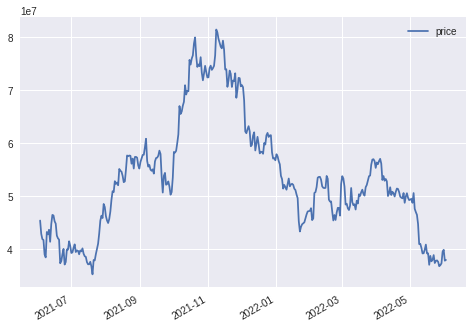

In [29]:
df = pyupbit.get_ohlcv("KRW-BTC", interval="day", count=365).loc[:, "close"].to_frame()
df.rename(columns = {'close':'price'},inplace=True)
df.plot()

# 64. MACD 전략 정의(1)

In [36]:
df = pyupbit.get_ohlcv("KRW-BTC", interval="day", count=365).loc[:, "close"].to_frame()
df.rename(columns = {'close':'price'},inplace=True)
type(df)

pandas.core.frame.DataFrame

In [33]:
ema_s = 12
ema_l = 26

In [39]:
df["EMA_S"] = df.price.ewm(span = ema_s, min_periods=ema_s).mean()

In [41]:
df["EMA_L"] = df.price.ewm(span = ema_l, min_periods=ema_l).mean()

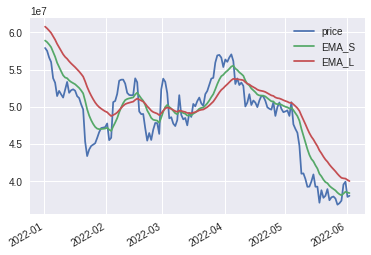

In [43]:
df.loc["2022"].plot(figsize=(6,4))

In [44]:
df["MACD"] = df.EMA_S - df.EMA_L

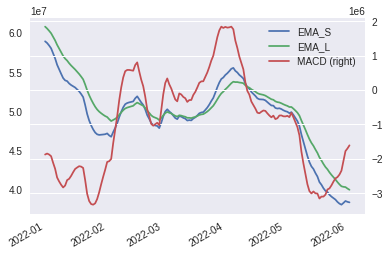

In [45]:
df.loc["2022", ["EMA_S", "EMA_L", "MACD"]].plot(figsize=(6,4), secondary_y="MACD")

In [46]:
signal_mw = 9 
df["MACD_Signal"] = df.MACD.ewm(span=signal_mw, min_periods=signal_mw).mean()

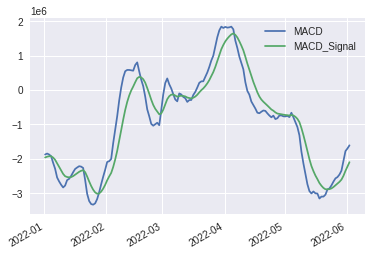

In [48]:
df.loc["2022", ["MACD", "MACD_Signal"]].plot(figsize=(6,4))

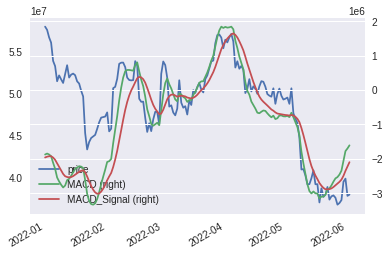

In [51]:
df.loc["2022", ["price", "MACD", "MACD_Signal"]].plot(figsize=(6,4), secondary_y=["MACD","MACD_Signal"])

# 65. MACD 전략 정의(2)

In [54]:
df["position"] = np.where(df.MACD - df.MACD_Signal > 0, 1, -1)

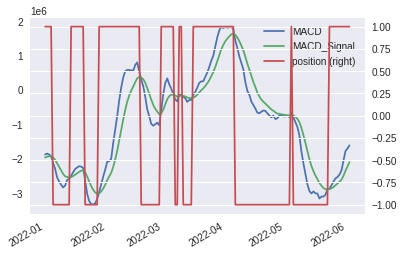

In [56]:
df.loc["2022", ["MACD", "MACD_Signal", "position"]].plot(figsize=(6,4), secondary_y="position")

# 66. 벡터화를 통한 전략 백테스팅

In [58]:
df["returns"] = np.log(df.price.div(df.price.shift(1)))

In [59]:
df.dropna(inplace=True)

In [60]:
df["strategy"] = df.position.shift(1) * df["returns"]

In [61]:
df.dropna(inplace = True)

In [62]:
df["trades"] = df.position.diff().fillna(0).abs()

In [63]:
df["creturns"] = df["returns"].cumsum().apply(np.exp)
df["cstrategy"] = df["strategy"].cumsum().apply(np.exp)

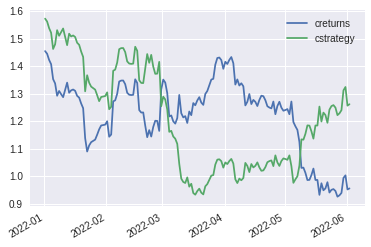

In [64]:
df.loc["2022",["creturns", "cstrategy"]].plot(figsize=(6,4))

# 67. MACD 백테스팅 클래스 실행

- https://academy.binance.com/ko/articles/what-is-backtesting
- backtesting
- forward testing
  - out date
  - cherry-picking

# 68. OOP 도전 과제 : MACD 백테스팅 클래스 만들기

In [65]:
import pandas as pd
import numpy as np
import pyupbit
import matplotlib.pyplot as plt
import datetime


class CoinInstrument:
    KST = datetime.timezone(datetime.timedelta(hours=9))

    def __init__(self, ticker, to=None, count=200, interval='day', period=0.5):
        self._data = None
        self.ticker = ticker
        self.interval = interval
        self.count = count
        self.to = to
        self.period = period
        self.load_data()
        self._data["log_returns"] = self.log_returns()

    def __repr__(self):
        return "CoinInstrument(ticker={}, to={}, count={}, interval={})".format(self.ticker, self.to,
                                                                                self.count, self.interval)

    # def to_origin(self):
    #     return self._utc_to_kst(self._to)
    #
    # def _kst_to_utc(self, to):
    #     return pd.to_datetime(to).to_pydatetime().replace(tzinfo=CoinInstrument.KST).astimezone(
    #         datetime.timezone.utc).strftime("%Y-%m-%d %H:%M:%S")
    #
    # def _utc_to_kst(self, to):
    #     return pd.to_datetime(to).to_pydatetime().replace(tzinfo=datetime.timezone.utc).astimezone(
    #         CoinInstrument.KST).strftime("%Y-%m-%d %H:%M:%S")

    def load_data(self):
        self._data = pyupbit.get_ohlcv(self.ticker, self.interval, self.count, self.to, self.period)
        # self._data.index = self._data.index.tz_convert(None).tz_localize('Asia/Seoul')

    def symbol(self):
        return self.ticker

    def log_returns(self):
        return np.log(self._data.close / self._data.close.shift(1))

    def plot_prices(self, figsize=(12, 8)):
        self._data.close.plot(figsize=figsize)
        plt.title("Close chart : {}".format(self.ticker), fontsize=15)

    def plot_returns(self, kind="ts", figsize=(12, 8)):
        if kind == "ts":
            self._data.log_returns.plot(figsize=figsize)
            plt.title("Returns : {}".format(self.ticker), fontsize=15)
        elif kind == "hist":
            self._data.log_returns.hist(figsize=figsize, bins=int(np.sqrt(len(self._data))))
            plt.title("Frequency of Returns : {}".format(self.ticker), fontsize=15)

    def head(self, n=5):
        return self._data.head(n)

    def tail(self, n=5):
        return self._data.tail(n)
    
    def sma(self, window):
        return self._data.close.rolling(window).mean()
    
    def ema(self, window):
        return self._data.close.ewm(span=window, min_periods=window).mean()

    def macd(self, ema_s, ema_l, signal_window):
        raw = pd.DataFrame(index=self._data.index)
        raw["EMA_S"] = self.ema(ema_s)
        raw["EMA_L"] = self.ema(ema_l)
        raw["MACD"] = raw.EMA_S - raw.EMA_L
        raw["MACD_SIGNAL"] = raw.MACD.ewm(span=signal_window, min_periods=signal_window).mean()
        return raw.loc[:, ["MACD", "MACD_SIGNAL"]].copy()

In [67]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
from scipy.optimize import brute
import numpy as np
import pandas as pd

class MACDBackTester:
  def __init__(self, symbol, to=None, count=200, interval='day', period=0.5, ema_s=12, ema_l=26, signal_window=9):
    self.results = None
    self._data = None
    self.coinInstrument = CoinInstrument(symbol, to, count, interval, period)
    self._ema_s = ema_s
    self._ema_l = ema_l
    self._signal_window = signal_window
    self.load_data()

  def __repr__(self):
    return "MACDBackTester(ticker={}, to={}, count={}, interval={}, ema_s={}, ema_l={}, signal={})"\
      .format(self.coinInstrument.ticker, self.coinInstrument.to, self.coinInstrument.count, self.coinInstrument.interval,
              self._ema_s, self._ema_l, self._signal_window)

  def load_data(self):
    self._data = self.coinInstrument.macd(self._ema_s, self._ema_l, self._signal_window)

  def set_parameters(self, ema_s=None, ema_l=None, signal_window=None):
    if ema_s is not None:
      self._ema_s = ema_s
    if ema_l is not None:
      self._ema_l = ema_l
    if signal_window is not None:
      self._signal_window = signal_window

    self.load_data()

  def test_strategy(self):
    data = self._data.copy()
    data["returns"] = self.coinInstrument.log_returns()
    data.dropna(inplace=True)
    data["position"] = np.where(data["MACD_SIGNAL"] < data["MACD"], 1, -1)
    data["strategy"] = data["position"].shift(1) * data["returns"]
    data.dropna(inplace=True)
    data["creturns"] = data["returns"].cumsum().apply(np.exp)
    data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
    self.results = data
    perf = data["cstrategy"].iloc[-1]
    outperf = perf - data["creturns"].iloc[-1]
    return round(perf, 6), round(outperf, 6)

  def plot_returns(self):
    if self.results is None:
      print("No results to plot yet. Run a strategy")
    else:
      title = "{} | MACD = {}/{} | SIGNAL = {}".format(self.coinInstrument.symbol(), self._ema_s, self._ema_l, self._signal_window)
      self.results[["creturns", "cstrategy"]].plot(title=title, figsize=(6,4))

  def update_and_run(self, macd=None):
    self.set_parameters(int(macd[0]), int(macd[1]), int(macd[2]))
    return -self.test_strategy()[0]

  def optimize_parameters(self, ema_s_range, ema_l_range, window_range):
    opt = brute(self.update_and_run, (ema_s_range, ema_l_range, window_range), finish=None)
    return opt, -self.update_and_run(opt)


In [77]:
tester = MACDBackTester("KRW-BTC", count=365, interval="day")

In [78]:
tester.test_strategy()

(1.2583, 0.305419)

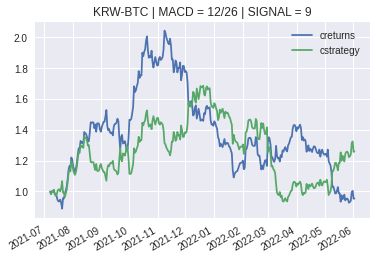

In [79]:
tester.plot_returns()

In [80]:
res = tester.optimize_parameters((10,20,1), (20,100, 1), (5,10,1))
res

(array([18., 44.,  8.]), 2.471312)

In [81]:
tester.set_parameters(18,33,8)

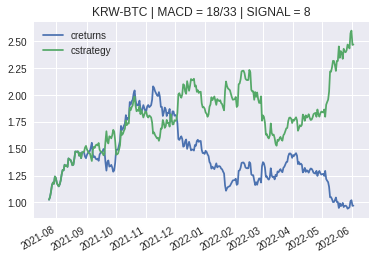

In [82]:
tester.plot_returns()

# 69. 대체 MACD 전략과 해석

- Zero Crossover

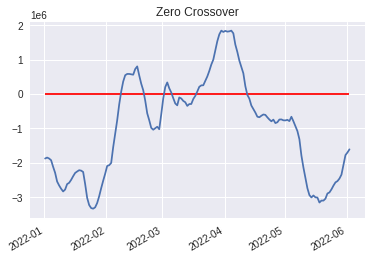

In [85]:
alt = df.loc["2022"]
alt.MACD.plot(figsize=(6,4))
plt.hlines(y=0, xmin = alt.index[0], xmax = alt.index[-1], color="r",label="zero")
plt.title("Zero Crossover")
plt.show()

- 수렴(convergence)
  - if 가격 고점, MACD 고점
  - if 가격 저점, MACD 저점
- 확산(divergence)
  - if 가격 고점, MACD fail(Bearish Divergence)
    - 2021 3~5
  - if 가격 저점, MACD fail(Bullish Divergence)
    - 2019 10~12 

In [103]:
df = pyupbit.get_ohlcv("KRW-BTC", interval="day", count=365*5)
df.rename(columns = {'close':'price'},inplace=True)

In [110]:
df["EMA_S"] = df.price.ewm(span = 18, min_periods=18).mean()

In [111]:
df["EMA_L"] = df.price.ewm(span = 44, min_periods=4).mean()

In [112]:
df["MACD"] = df.EMA_S - df.EMA_L

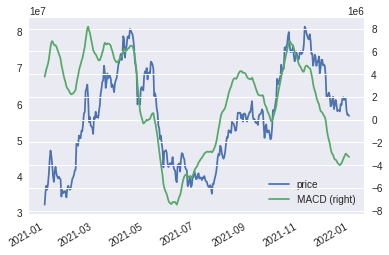

In [113]:
df.loc["2021", ["price", "MACD"]].plot(figsize=(6,4), secondary_y="MACD")

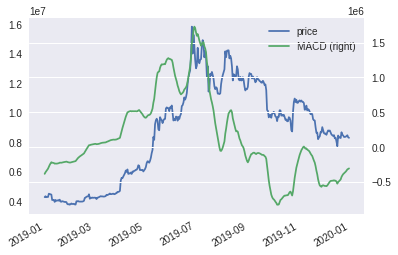

In [115]:
df.loc["2019", ["price", "MACD"]].plot(figsize=(6,4), secondary_y="MACD")

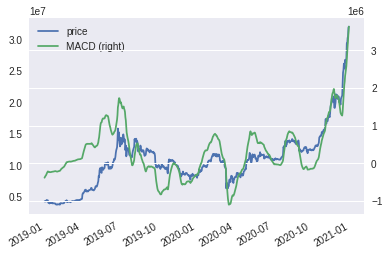

In [116]:
df.loc["2019":"2020", ["price", "MACD"]].plot(figsize=(6,4), secondary_y="MACD")